# sciblox v2 (Daniel Han-Chen)

--------------------------------------------------------

--------------------------------------------------------

--------------------------------------------------------

Version 2 main highlights:
1. NEW: Machine Learning Modules (LightGBM + Random Forests supported as of now)
2. NEW: Feature importance analyser
3. NEW: Advanced data preprocessing and analysis

Version 2 changes:
1. Fixed errors when hcat or vcat'ing
2. Faster converging BPCA impute
3. Added machine learning modules
4. Added new data analysis methods - unskew, remove outliers
5. Better data analyser methods
6. Streamlined package
7. AUTO Package installs

--------------------------------------------------------

--------------------------------------------------------

--------------------------------------------------------

### Use "notebook" for plot customisations. "inline" for static plot

In [1]:
%matplotlib notebook
from sciblox2 import *

### Showcase:

<IPython.core.display.Javascript object>


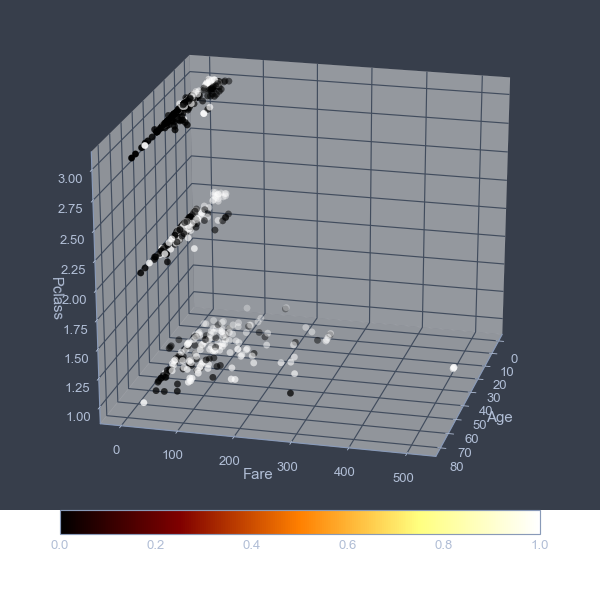

In [2]:
x = read("train.csv")
analyse(x, y = "Survived")

In [3]:
varcheck(x)

In [4]:
varcheck(x, limit = False)

In [40]:
analyse(x, y = "Survived", limit = False, graph = False)

In [9]:
O = outlier(x, indicate = True)

No. outliers = 23


<IPython.core.display.Javascript object>


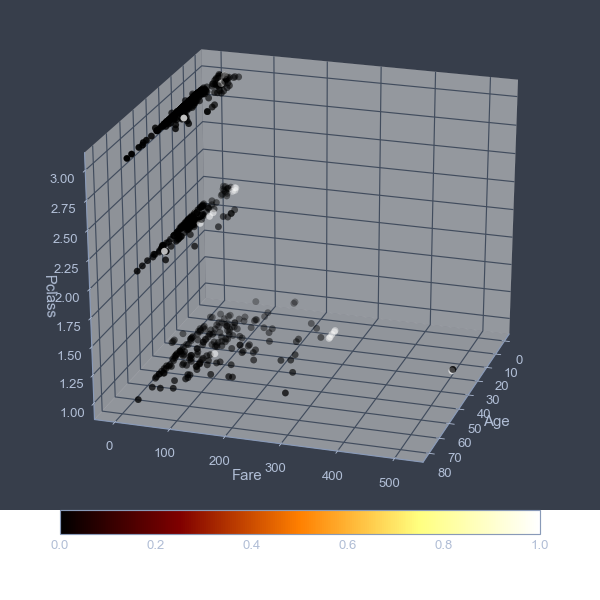

In [10]:
plot(x = "Age", y = "Fare", z = "Pclass", data = O, hue = "IsOutlier")

In [41]:
x = notoutlier(x)

No. outliers = 23


In [15]:
x_train, x_test, y_train, y_test, processor = preprocess(x, target = "Survived")

Please wait...
Done
--------------------------------
x_train, x_test, y_train, y_test
Processing finished :)


In [30]:
x_train, x_test, y_train, y_test, processor = preprocess(x, target = "Survived",
                                                        hold = 0.1, impute = "mice",
                                                        mice = "boost", scale = "robust",
                                                        dummy = True, norm = False)

Please wait...
Done
--------------------------------
x_train, x_test, y_train, y_test
Processing finished :)


In [34]:
modelrf = randomforest(x_train, x_test, y_train, y_test)
modellg = lightgbm(x_train, x_test, y_train, y_test)

--------------------------------
RandomForest: Training...
Finished
Score = kappa = 0.575549993413
Score = rmse = 0.448461055651
Score = OOB = 0.785112359551
--------------------------------
LightGBM: Training...
Finished
Score = kappa = 0.593153798471
Score = rmse = 0.429368771453


In [32]:
test = read("test.csv")
test = prefit(test, processor)
sample(test)

Please wait...
Done


Pclass       Age  SibSp  Parch      Fare  Pclass_1.0  Pclass_2.0  \
204    -1.0 -0.205882    0.0    0.0 -0.171255         0.0         1.0   
85      0.0 -0.759688    1.0    0.0  0.000000         0.0         0.0   
394     0.0  0.029412    3.0    1.0  0.327888         0.0         0.0   
395    -2.0 -0.617647    1.0    0.0  1.972568         1.0         0.0   
213    -1.0  1.852941    1.0    0.0  0.500043         0.0         1.0   

     Pclass_3.0  Sex_female  Sex_male     ...      Parch_0.0  Parch_1.0  \
204        -1.0         0.0       0.0     ...            0.0        0.0   
85          0.0         0.0       0.0     ...            0.0        0.0   
394         0.0         0.0       0.0     ...           -1.0        1.0   
395        -1.0         1.0      -1.0     ...            0.0        0.0   
213        -1.0         1.0      -1.0     ...            0.0        0.0   

     Parch_2.0  Parch_3.0  Parch_4.0  Parch_5.0  Parch_6.0  Embarked_C  \
204        0.0        0.0        0.0        0.0        0.0         0.0   
85         0.0        0.0        0.0        0.0        0.0         1.0   
394        0.0        0.0        0.0        0.0        0.0         0.0   
395        0.0        0.0        0.0        0.0        0.0         0.0   
213        0.0        0.0        0.0        0.0        0.0         0.0   

     Embarked_Q  Embarked_S  
204         0.0         0.0  
85          0.0        -1.0  
394         0.0         0.0  
395         0.0         0.0  
213         0.0         0.0  

[5 rows x 27 columns]

In [35]:
predict(test = test, model = modellg, processor = processor)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0,

<IPython.core.display.Javascript object>


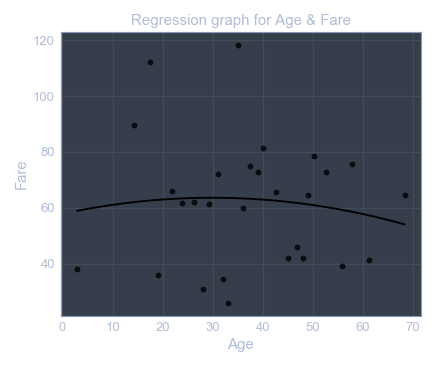

In [42]:
plot(x = "Age", y = "Fare", data = x)

<IPython.core.display.Javascript object>


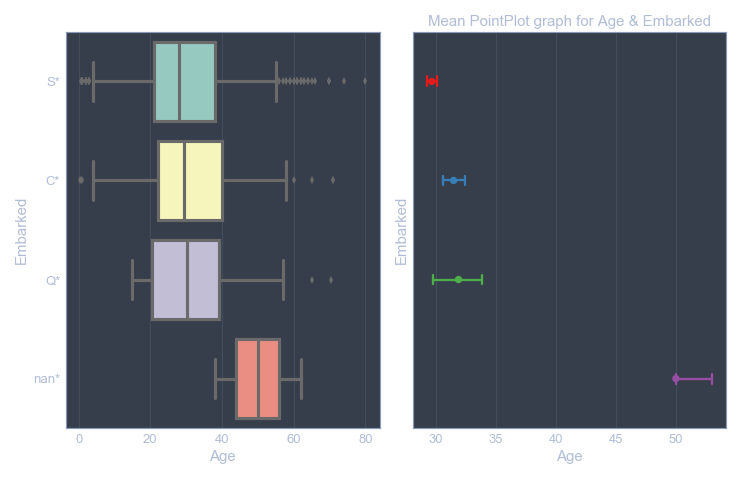

In [43]:
plot(x = "Age", y = "Embarked", data = x)

<IPython.core.display.Javascript object>


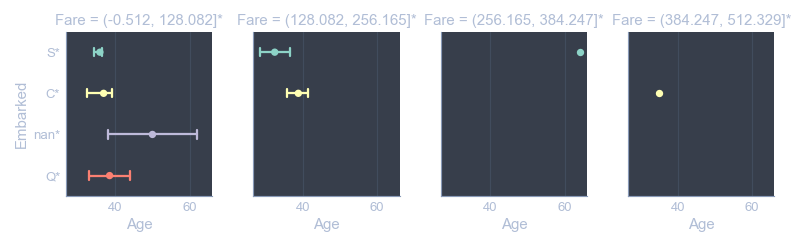

In [45]:
plot(x = "Age", y = "Embarked", data = x, hue = "Fare")

<IPython.core.display.Javascript object>


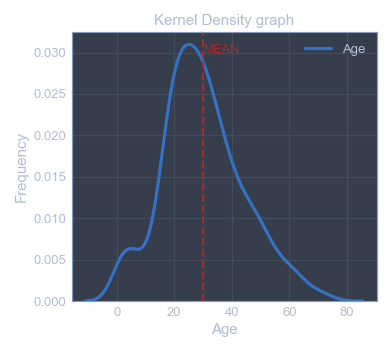

In [46]:
plot(x = "Age", data = x)